In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [92]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [93]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [94]:
len(df)

5572

In [96]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [97]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

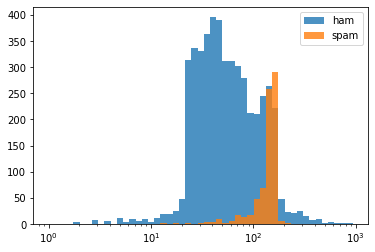

In [98]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(['ham','spam']);

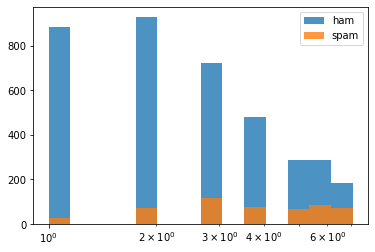

In [99]:
plt.xscale('log')
bins = 1.15**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(['ham','spam']);

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
np.random.seed(42)
X = df[['length','punct']]
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=42)

In [102]:
X_train.shape,X_test.shape

((3900, 2), (1672, 2))

In [103]:
y_train.shape,y_test.shape

((3900,), (1672,))

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
model = LogisticRegression(solver='lbfgs')

model.fit(X_train,y_train)

LogisticRegression()

In [106]:
model.score(X_test,y_test)

0.8427033492822966

In [107]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [108]:
y_preds = model.predict(X_test)

In [109]:
y_preds

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [110]:
cm = confusion_matrix(y_test,y_preds)

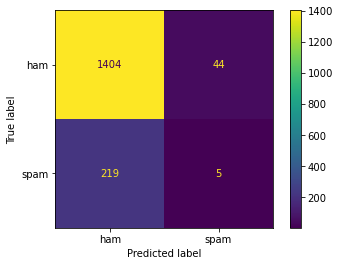

In [111]:
disp = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot();

In [112]:
confuse_df = pd.DataFrame(cm,index=['ham','spam'],columns=['ham','spam'])

In [113]:
confuse_df

,ham,spam
ham,1404,44
spam,219,5


In [114]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [115]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.naive_bayes import MultinomialNB

In [116]:
nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

y_preds = nb_model.predict(X_test)

In [117]:
cm = confusion_matrix(y_test,y_preds)

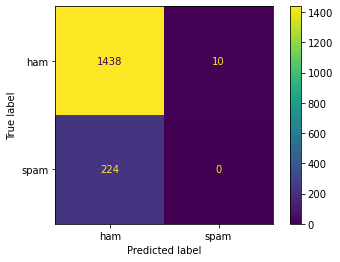

In [118]:
disp = ConfusionMatrixDisplay(cm,display_labels=nb_model.classes_)
disp.plot()

In [119]:
nb_model.score(X_test,y_test)

0.8600478468899522

In [120]:
from sklearn.svm import SVC


In [124]:
def predicting_model(model):
    """
    Predicting model and plot confusion matrix
    
    """
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    print(f"predicted score of the model is {model.score(X_test,y_test)*100}% ")
    cm = confusion_matrix(y_test,y_preds)
    disp = ConfusionMatrixDisplay(cm,display_labels=nb_model.classes_)
    disp.plot()

predicted score of the model is 88.27751196172248% 


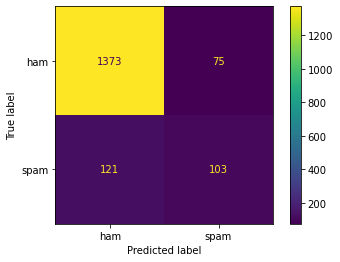

In [125]:
svc_model = SVC(gamma='auto')
predicting_model(svc_model)

predicted score of the model is 84.27033492822966% 


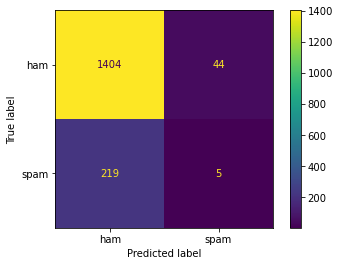

In [126]:
predicting_model(model)

predicted score of the model is 86.00478468899522% 


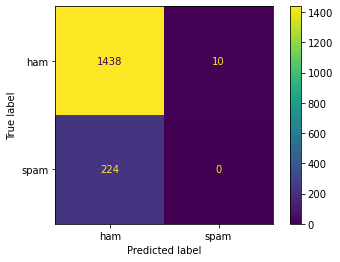

In [127]:
predicting_model(nb_model)